# 1. Basis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

'''
# Understanding Basis in Linear Algebra

## Definition

A basis is a set of vectors that satisfy two fundamental properties:
1. Linear Independence
2. Span

Let's formalize this mathematically:

### Linear Independence
A set of vectors $\{v_1, v_2, ..., v_n\}$ is linearly independent if the equation:

$c_1v_1 + c_2v_2 + ... + c_nv_n = 0$

has only the trivial solution $c_1 = c_2 = ... = c_n = 0$

### Span
The span of a set of vectors is all possible linear combinations of those vectors:

$span\{v_1, v_2, ..., v_n\} = \{c_1v_1 + c_2v_2 + ... + c_nv_n : c_i \in \mathbb{R}\}$

### Formal Definition
A basis for a vector space $V$ is a linearly independent set of vectors that spans $V$.

## Standard Basis

The most common basis in $\mathbb{R}^n$ is the standard basis. For example:

In $\mathbb{R}^2$:
$e_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, e_2 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

In $\mathbb{R}^3$:
$e_1 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}, 
e_2 = \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix},
e_3 = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$
'''

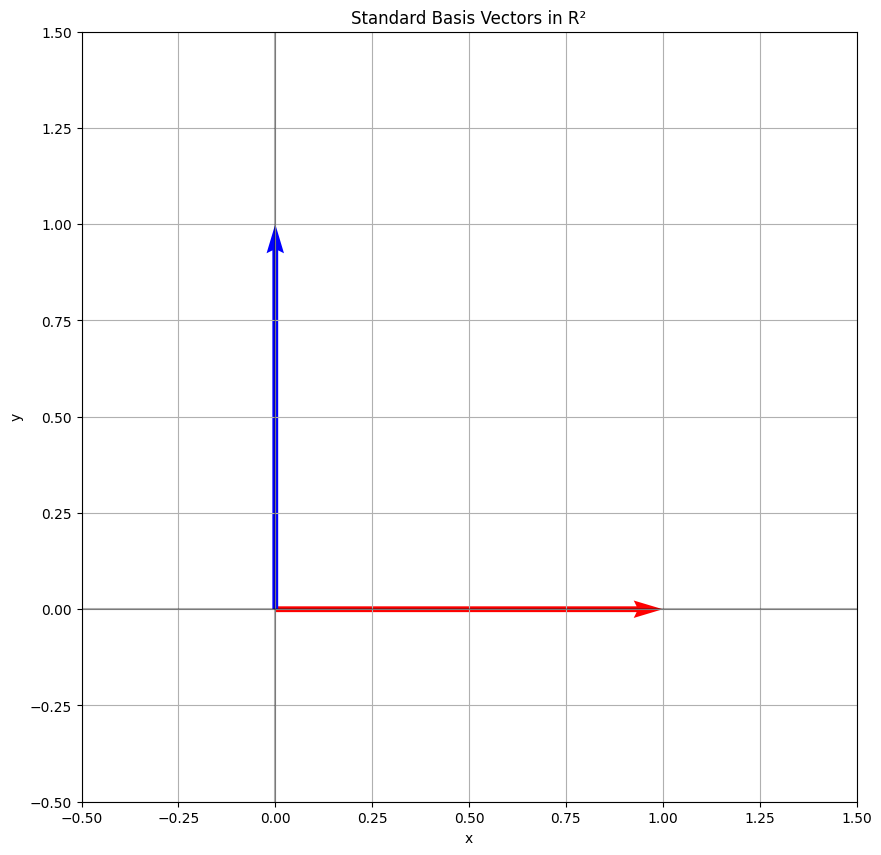

In [4]:
plt.figure(figsize=(10, 10))
plt.quiver([0, 0], [0, 0], [1, 0], [0, 1], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.title('Standard Basis Vectors in R²')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

'''
## Alternative Bases

Any set of linearly independent vectors that span the space can serve as a basis. For example, in $\mathbb{R}^2$, we could have:

$v_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, v_2 = \begin{pmatrix} -1 \\ 1 \end{pmatrix}$

This is also a valid basis because:
1. These vectors are linearly independent
2. They span $\mathbb{R}^2$

Let's visualize this alternative basis:
'''

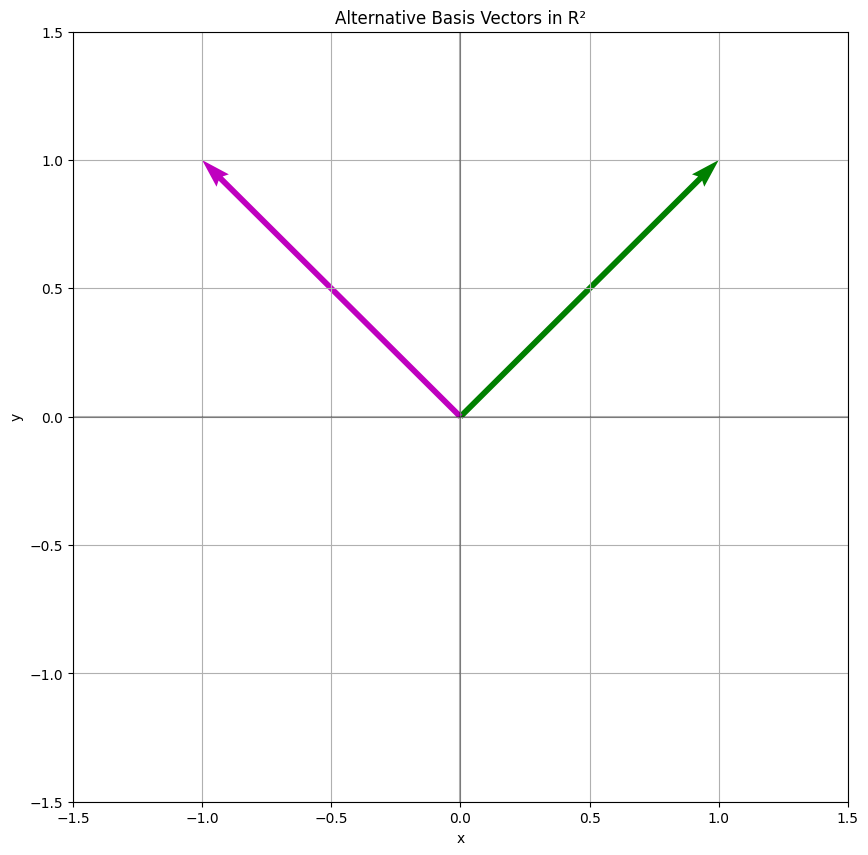

In [5]:
plt.figure(figsize=(10, 10))
plt.quiver([0, 0], [0, 0], [1, -1], [1, 1], angles='xy', scale_units='xy', scale=1, color=['g', 'm'])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.title('Alternative Basis Vectors in R²')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

'''
## Important Properties of Bases

1. **Uniqueness of Representation**: Every vector in the space can be written uniquely as a linear combination of basis vectors.

For example, given a vector $w = \begin{pmatrix} 2 \\ 3 \end{pmatrix}$ in $\mathbb{R}^2$, we can write:

$w = 2e_1 + 3e_2$ (in standard basis)

2. **Dimension**: The number of vectors in a basis is always the same for a given vector space. This number is called the dimension of the space.

3. **Change of Basis**: We can convert coordinates from one basis to another using change of basis matrices.

Let's demonstrate this with code:
'''

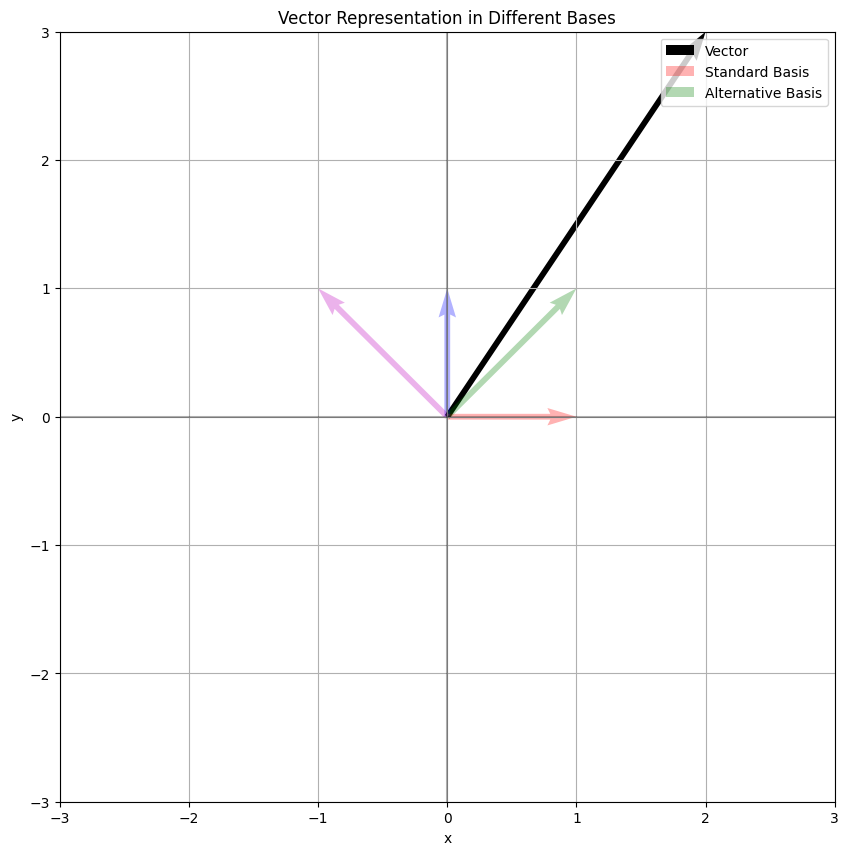

In [6]:
def plot_vector_in_bases(vector, std_basis=True, alt_basis=True):
    plt.figure(figsize=(10, 10))
    
    # Original vector
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='k', label='Vector')
    
    if std_basis:
        # Standard basis vectors
        plt.quiver([0, 0], [0, 0], [1, 0], [0, 1], angles='xy', scale_units='xy', scale=1, 
                  color=['r', 'b'], alpha=0.3, label='Standard Basis')
    
    if alt_basis:
        # Alternative basis vectors
        plt.quiver([0, 0], [0, 0], [1, -1], [1, 1], angles='xy', scale_units='xy', scale=1,
                  color=['g', 'm'], alpha=0.3, label='Alternative Basis')
    
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid(True)
    plt.title('Vector Representation in Different Bases')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.legend()
    plt.show()

# Example vector
v = np.array([2, 3])
plot_vector_in_bases(v)

'''
## Checking if Vectors Form a Basis

To check if a set of vectors forms a basis, we need to verify:
1. Linear independence
2. Spanning property

We can do this by checking the determinant of the matrix formed by these vectors. If the determinant is non-zero, the vectors are linearly independent.

Let's implement this:
'''

In [7]:
def is_basis(vectors):
    """Check if a set of vectors forms a basis"""
    # Convert to numpy array
    A = np.array(vectors).T
    
    # Check if matrix is square (number of vectors equals dimension)
    if A.shape[0] != A.shape[1]:
        return False
    
    # Check if determinant is non-zero (linear independence)
    return np.abs(np.linalg.det(A)) > 1e-10

# Example usage
vectors1 = [[1, 0], [0, 1]]  # Standard basis
vectors2 = [[1, 1], [1, 1]]  # Not a basis
vectors3 = [[1, 1], [-1, 1]]  # Alternative basis

print(f"Standard basis: {is_basis(vectors1)}")
print(f"Not a basis: {is_basis(vectors2)}")
print(f"Alternative basis: {is_basis(vectors3)}")

Standard basis: True
Not a basis: False
Alternative basis: True


## 2. Change of Basis

### Mathematical Foundation

A change of basis is a way to convert the coordinates of a vector from one basis to another. Let's say we have:
- A vector $v$
- Two bases $B = \{b_1, ..., b_n\}$ and $B' = \{b'_1, ..., b'_n\}$
- Coordinates $[v]_B = (x_1, ..., x_n)$ in basis $B$
- Coordinates $[v]_{B'} = (x'_1, ..., x'_n)$ in basis $B'$

The change of basis matrix $P_{B \to B'}$ satisfies:

$[v]_{B'} = P_{B \to B'} [v]_B$

The change of basis matrix is computed as:
$P_{B \to B'} = [I]_{B \to B'} = [[b_1]_{B'} ... [b_n]_{B'}]$

Where $[b_i]_{B'}$ are the coordinates of the old basis vectors in terms of the new basis.

In [8]:
def change_basis_demonstration():
    # Define two bases
    B = np.array([[1, 0], [0, 1]])  # Standard basis
    Bp = np.array([[1, -1], [1, 1]])  # New basis
    
    # Create change of basis matrix
    P = np.linalg.inv(Bp)  # From new to standard
    P_inverse = Bp        # From standard to new
    
    # Example vector in standard basis
    v_standard = np.array([2, 1])
    
    # Convert to new basis
    v_new = P @ v_standard
    
    # Visualize
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot in standard basis
    ax1.quiver(0, 0, B[0, 0], B[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label='b1')
    ax1.quiver(0, 0, B[0, 1], B[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label='b2')
    ax1.quiver(0, 0, v_standard[0], v_standard[1], angles='xy', scale_units='xy', scale=1, color='k', label='v')
    ax1.grid(True)
    ax1.set_title('Vector in Standard Basis')
    ax1.legend()
    
    # Plot in new basis
    ax2.quiver(0, 0, Bp[0, 0], Bp[1, 0], angles='xy', scale_units='xy', scale=1, color='r', label="b'1")
    ax2.quiver(0, 0, Bp[0, 1], Bp[1, 1], angles='xy', scale_units='xy', scale=1, color='b', label="b'2")
    ax2.quiver(0, 0, v_new[0], v_new[1], angles='xy', scale_units='xy', scale=1, color='k', label='v')
    ax2.grid(True)
    ax2.set_title('Vector in New Basis')
    ax2.legend()
    
    plt.show()
    
    return P, v_standard, v_new

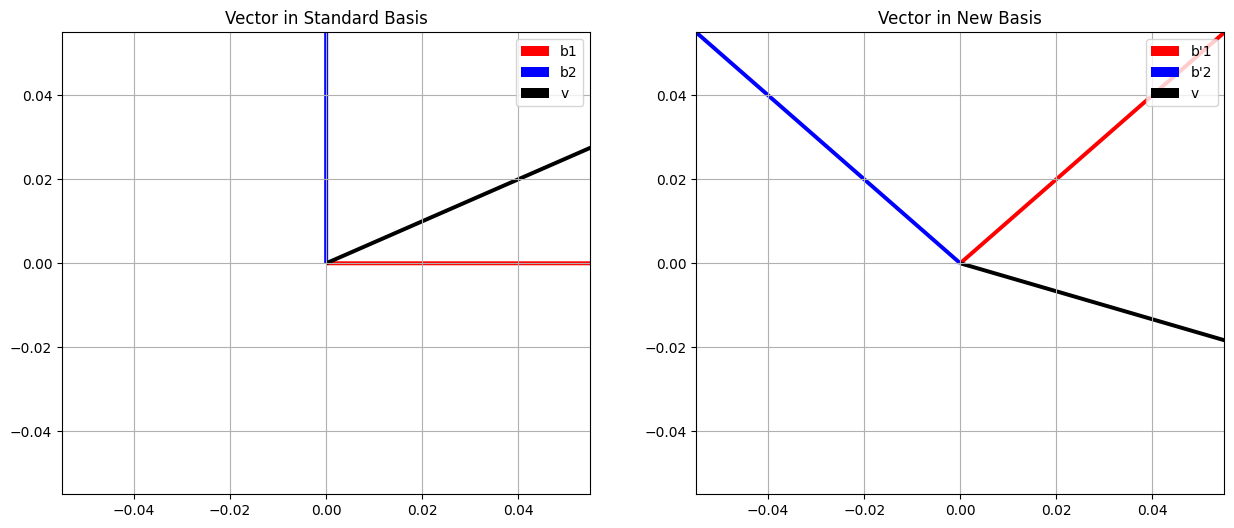

In [9]:
P, v_std, v_new = change_basis_demonstration()

## 2. Vector Spaces as Geometric Objects

A vector space is an abstract mathematical structure that exists independently of any particular basis. Think of it as a geometric object that has certain properties (addition and scalar multiplication) but doesn't come with a "built-in" coordinate system.

### Key Insights:

1. **Coordinate-Free Nature**:
   - A vector space exists without reference to any particular basis
   - A basis is like choosing a coordinate system - it's a tool we use to describe points in the space
   - Different bases are equally valid ways of describing the same space

2. **Intrinsic Properties**:
   Some properties of a vector space are independent of basis choice:
   - Dimension
   - Linear independence of vectors
   - The "shape" of the space
   - Distance between points (if we have an inner product)

Let's visualize how the same vector space can be described using different bases:

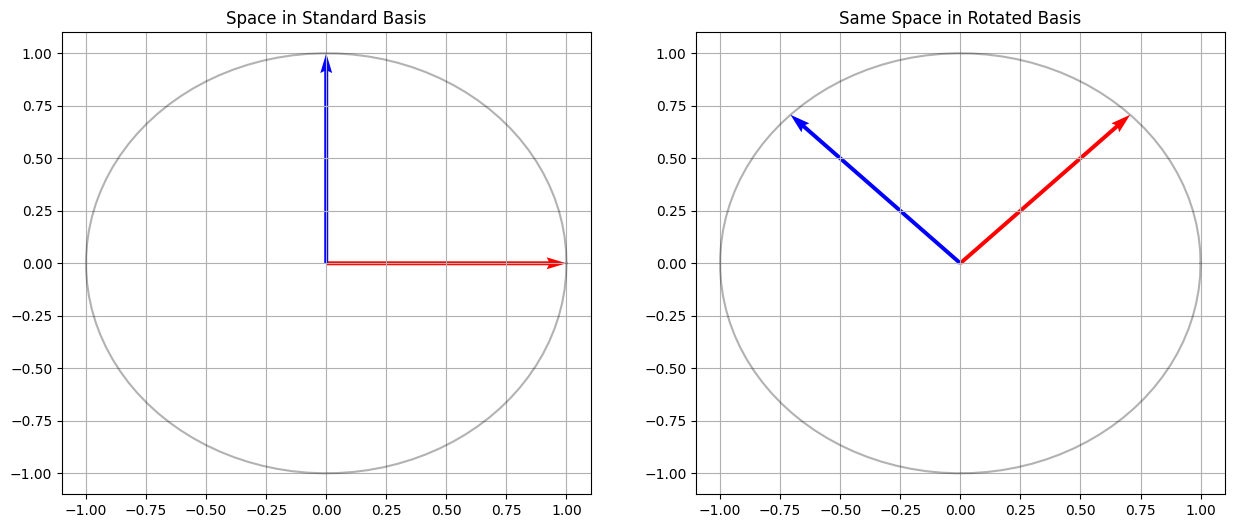

In [10]:
def visualize_same_space_different_bases():
    # Create a set of points in R²
    theta = np.linspace(0, 2*np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    
    # Create two different bases
    basis1 = np.array([[1, 0], [0, 1]])
    basis2 = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
                       [np.sin(np.pi/4), np.cos(np.pi/4)]])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot in standard basis
    ax1.plot(x, y, 'k-', alpha=0.3)
    ax1.quiver(0, 0, basis1[0, 0], basis1[1, 0], angles='xy', scale_units='xy', scale=1, color='r')
    ax1.quiver(0, 0, basis1[0, 1], basis1[1, 1], angles='xy', scale_units='xy', scale=1, color='b')
    ax1.grid(True)
    ax1.set_title('Space in Standard Basis')
    
    # Plot in rotated basis
    ax2.plot(x, y, 'k-', alpha=0.3)
    ax2.quiver(0, 0, basis2[0, 0], basis2[1, 0], angles='xy', scale_units='xy', scale=1, color='r')
    ax2.quiver(0, 0, basis2[0, 1], basis2[1, 1], angles='xy', scale_units='xy', scale=1, color='b')
    ax2.grid(True)
    ax2.set_title('Same Space in Rotated Basis')
    
    plt.show()

visualize_same_space_different_bases()

## 3. Matrices as Linear Maps

A matrix can be viewed as a representation of a linear transformation between vector spaces. This is a profound perspective that connects algebraic and geometric thinking.

### Mathematical Framework

Given vector spaces $V$ and $W$ with bases $B_V$ and $B_W$, a linear transformation $T: V \to W$ can be represented by a matrix $[T]_{B_V}^{B_W}$ where:

$[T(v)]_{B_W} = [T]_{B_V}^{B_W}[v]_{B_V}$

Key Points:
1. The matrix depends on the choice of bases in both spaces
2. The transformation itself is basis-independent
3. Different matrices can represent the same transformation in different bases

Let's visualize how a linear transformation acts on a vector space:

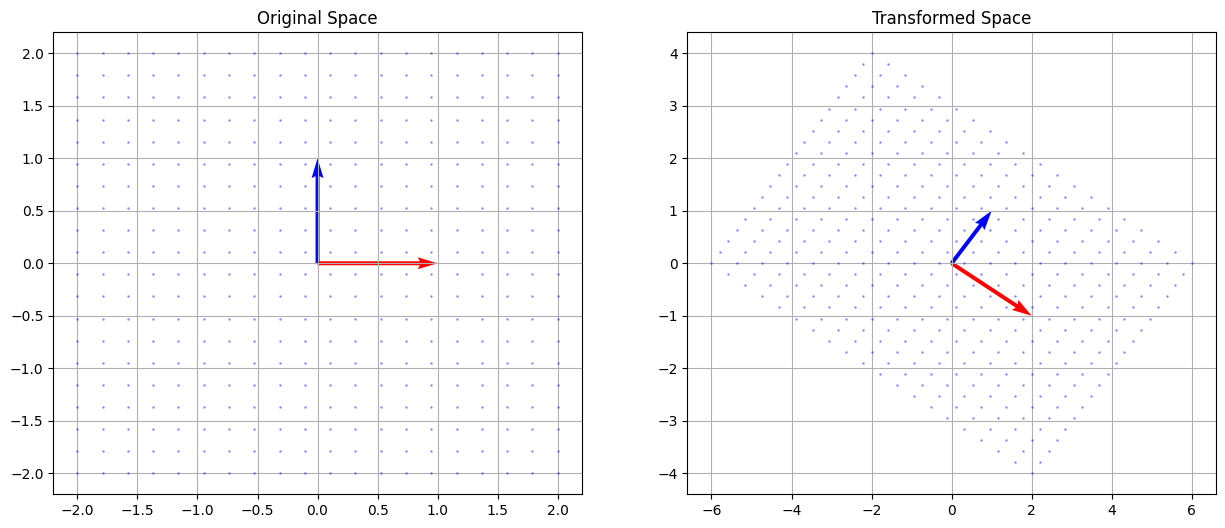

In [11]:
def visualize_linear_transformation():
    # Create a grid of points
    x = np.linspace(-2, 2, 20)
    y = np.linspace(-2, 2, 20)
    X, Y = np.meshgrid(x, y)
    
    # Define a linear transformation
    A = np.array([[2, 1], [-1, 1]])
    
    # Apply transformation to each point
    points = np.column_stack((X.flatten(), Y.flatten()))
    transformed_points = points @ A.T
    
    X_transformed = transformed_points[:, 0].reshape(X.shape)
    Y_transformed = transformed_points[:, 1].reshape(Y.shape)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Original space
    ax1.plot(X, Y, 'b.', alpha=0.3, markersize=2)
    ax1.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='r')
    ax1.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='b')
    ax1.set_title('Original Space')
    ax1.grid(True)
    
    # Transformed space
    ax2.plot(X_transformed, Y_transformed, 'b.', alpha=0.3, markersize=2)
    transformed_basis_1 = A @ np.array([1, 0])
    transformed_basis_2 = A @ np.array([0, 1])
    ax2.quiver(0, 0, transformed_basis_1[0], transformed_basis_1[1], 
               angles='xy', scale_units='xy', scale=1, color='r')
    ax2.quiver(0, 0, transformed_basis_2[0], transformed_basis_2[1], 
               angles='xy', scale_units='xy', scale=1, color='b')
    ax2.set_title('Transformed Space')
    ax2.grid(True)
    
    plt.show()

visualize_linear_transformation()

### Important Concepts About Linear Maps

1. **Basis Independence**
   - The linear transformation exists independently of any choice of basis
   - Different matrices represent the same transformation in different bases
   - If $P$ is a change of basis matrix: $[T]_{\tilde{B}}^{\tilde{C}} = P^{-1}[T]_{B}^{C}P$

2. **Eigenvalues and Eigenvectors**
   - These are intrinsic properties of the linear transformation
   - Their values don't depend on the choice of basis
   - The matrices representing the same transformation in different bases are similar matrices

3. **Composition of Linear Maps**
   - Matrix multiplication represents composition of linear transformations
   - $(ST)(v) = S(T(v))$ corresponds to matrix product $[S][T]$

### Example Implementation:

In [12]:
def demonstrate_basis_independence():
    # Define a linear transformation
    T = np.array([[2, 1], [-1, 1]])
    
    # Define a change of basis matrix (rotation by 45 degrees)
    theta = np.pi/4
    P = np.array([[np.cos(theta), -np.sin(theta)], 
                  [np.sin(theta), np.cos(theta)]])
    
    # Compute the transformation matrix in the new basis
    T_new = np.linalg.inv(P) @ T @ P
    
    # Compare eigenvalues
    eig_T = np.linalg.eigvals(T)
    eig_T_new = np.linalg.eigvals(T_new)
    
    print("Original transformation eigenvalues:", eig_T)
    print("Transformed basis eigenvalues:", eig_T_new)
    
    return T, T_new

T, T_new = demonstrate_basis_independence()

Original transformation eigenvalues: [1.5+0.8660254j 1.5-0.8660254j]
Transformed basis eigenvalues: [1.5+0.8660254j 1.5-0.8660254j]


## Key Takeaways

1. **Change of Basis**
   - Is a fundamental operation in linear algebra
   - Allows us to represent the same vector in different coordinate systems
   - Is represented by an invertible matrix

2. **Vector Spaces**
   - Are geometric objects that exist independently of any basis
   - Have intrinsic properties that don't depend on choice of basis
   - Can be described equally well using different bases

3. **Linear Transformations**
   - Are more fundamental than their matrix representations
   - Have properties that are independent of basis choice
   - Can be represented by different matrices in different bases